In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import cv2

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

%matplotlib inline

In [2]:
file_names = os.listdir("./self_dataset/")
print(file_names)

['dogtest_1.png', 'dogtest_2.jpg', 'test_1.jpg', 'test_2.jpg', 'test_3.png', 'test_4.png']


In [6]:
#Define dataset here.

class Nude_dataset(Dataset):
    """
    Nude dataset
    """
    
    def __init__(self, PATH, transform = None):
        """
        args:
            PATH: directory where all images store
            transform: callable, optional, optional transform to be applied on sample.
        """
        self.PATH = PATH
        self.transform = transform
    
    def __len__(self):
        return len(os.listdir(self.PATH))
        
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        file_names = os.listdir(self.PATH)
            
        img_name = os.path.join(self.PATH, file_names[idx])
        
        image = io.imread(img_name)
        
        if self.transform:
            image = self.transform(image)
        
        return image




In [7]:
nude_dataset = Nude_dataset(PATH = './self_dataset/')

0 (660, 990, 4)


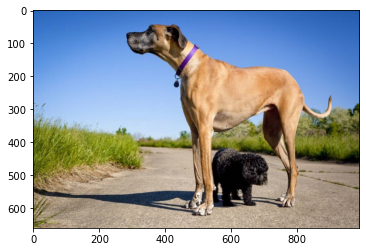

In [8]:
#to check the data set.
for i in range(len(nude_dataset)):
    
    if i %10 == 0:
        img = nude_dataset[i]
    
        print(i, img.shape)
        plt.imshow(img)
        plt.show()



In [9]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image= sample

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (self.output_size, self.output_size))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively

        return img




In [10]:
scale = Rescale(256)
#crop = RandomCrop(128)
#composed = transforms.Compose([Rescale(256),RandomCrop(224)])

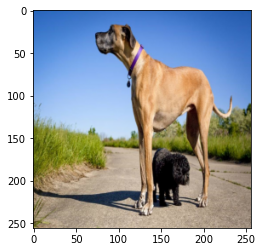

In [11]:
#test the transformation on the dataset.
for i in range(len(nude_dataset)):
    if i %10 == 0:
        fig = plt.figure()
        
        img = nude_dataset[i]
    
        for i, tsfm in enumerate([scale]):
            transformed_img = tsfm(img)
            plt.tight_layout()
            plt.imshow(transformed_img)
            plt.show()



In [12]:
transformed_nude_dataset = Nude_dataset(PATH = './cat_images/', transform = Rescale(128))

0 (128, 128, 3)


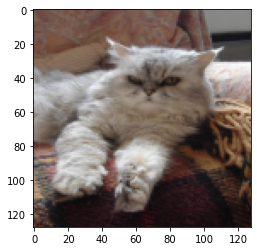

100 (128, 128, 3)


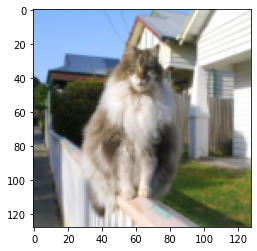

200 (128, 128, 3)


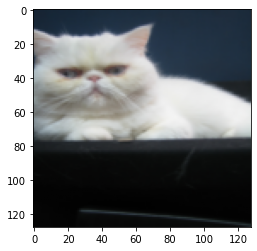

300 (128, 128, 3)


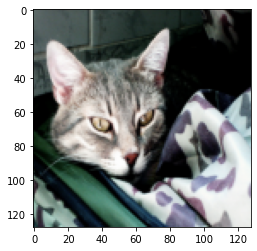

400 (128, 128, 3)


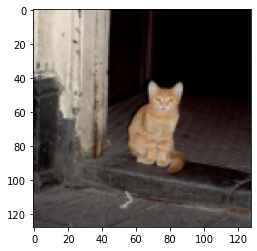

500 (128, 128, 3)


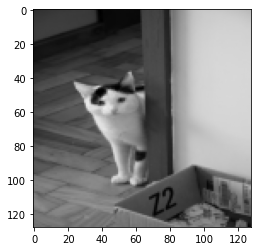

600 (128, 128, 3)


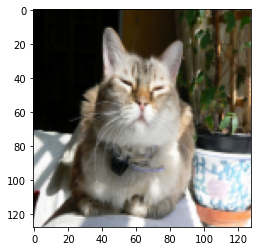

700 (128, 128, 3)


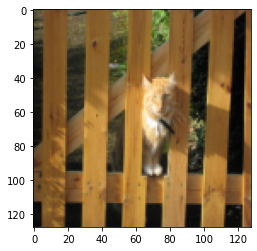

800 (128, 128, 3)


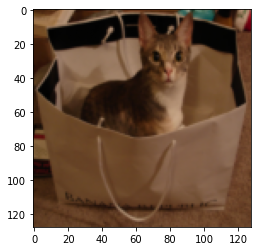

900 (128, 128, 3)


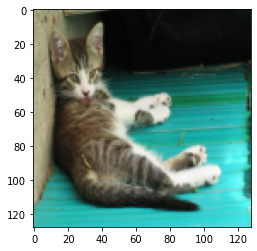

1000 (128, 128, 3)


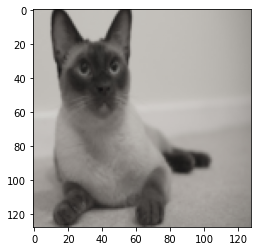

1100 (128, 128, 3)


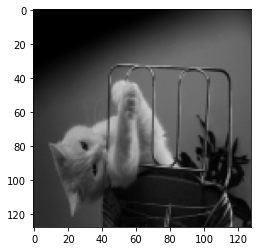

1200 (128, 128, 3)


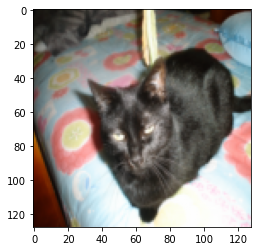

1300 (128, 128, 3)


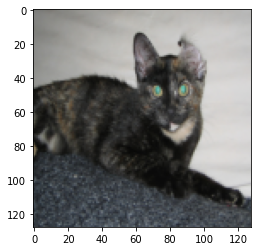

1400 (128, 128, 3)


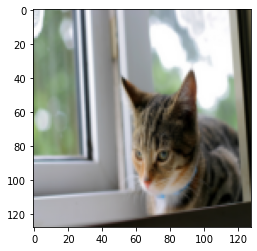

In [13]:
#to check the data set.
for i in range(len(transformed_nude_dataset)):
    
    if i %100 == 0:
        img = transformed_nude_dataset[i]
    
        print(i, img.shape)
        plt.imshow(img)
        plt.show()



In [14]:
# here the data baching.
dataloader = DataLoader(transformed_nude_dataset, batch_size=4, shuffle=True, num_workers=0)


0 torch.Size([4, 128, 128, 3])
1 torch.Size([4, 128, 128, 3])
2 torch.Size([4, 128, 128, 3])
3 torch.Size([4, 128, 128, 3])


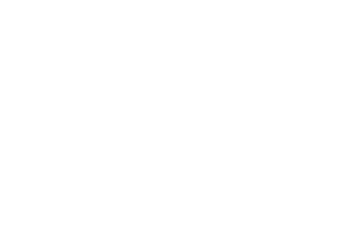

In [15]:
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched.size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        #show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [16]:
import torch
from torchvision import transforms, datasets

data_transform = transforms.Compose([transforms.Resize(128), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
#hymenoptera_dataset = datasets.ImageFolder(root='hymenoptera_data/train',transform=data_transform)

Nude_dataset(PATH = './self_dataset/', transform = data_transform)

dataloader = torch.utils.data.DataLoader(Nude_dataset,batch_size=4, shuffle=True,num_workers=4)

TypeError: object of type 'type' has no len()